In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [4]:
# Simple example - Creating logistic functions
z = torch.arange(-100, 100, 0.1).view(-1,1)
sig = nn.Sigmoid()
yhat = sig(z)

In [5]:
yhat

tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])

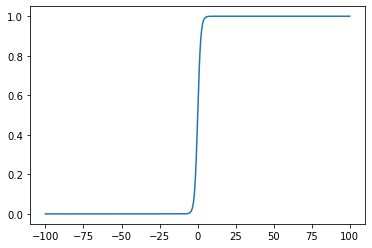

In [6]:
plt.plot(z.numpy(), yhat.numpy())

# Building Logistic Regression Model

In [7]:
# Using nn.sequential
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid()) # nn.Sigmoid is a constructor
x = torch.tensor([[1.5]])
yhat = model(x)

In [8]:
# Using nn.Module

import torch.nn as nn

class logistic_regression(nn.Module):
    def __init__(self,in_size,output_size):
        super(logistic_regression,self).__init__()
        self.linear=nn.Linear(in_size,output_size)
            
    def forward(self,x):
        x = torch.sigmoid(self.linear(x))
        return x

In [9]:
# Side by side comparison
torch.manual_seed(122)
custom_model = logistic_regression(1,1)
sequential_model = nn.Sequential(nn.Linear(1,1),nn.Sigmoid())

# Both produce same results - although might have randomly different w and b

**Making a Prediction**

In [10]:
torch.manual_seed(122)
model = logistic_regression(1,1)
print(list(model.parameters()))

x = torch.tensor([[1.0]])
yhat = model(x)
print("Yhat:", yhat)
# Gives model with b = 0.73 and w = -.62
# z = (-.062)*x + 0.73
#yhat = sigmoid(z) at given x. Here x = 1

[Parameter containing:
tensor([[-0.6202]], requires_grad=True), Parameter containing:
tensor([0.7383], requires_grad=True)]
Yhat: tensor([[0.5295]], grad_fn=<SigmoidBackward0>)


In [11]:
# Multi-sample
x = torch.tensor([[1.0],[100]])
yhat = model(x)
print(yhat)

tensor([[5.2949e-01],
        [2.4352e-27]], grad_fn=<SigmoidBackward0>)


**MultiDimensional Logistic Regression**

In [12]:
custom_2d_model = logistic_regression(2,1)
sequential_2d_model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())

In [13]:
torch.manual_seed(122)

# Lets take an example:
model = logistic_regression(2,1)
print(list(model.parameters()))
# b=0.3759, w =[-.4385,0.5220]

x = torch.tensor([[1.0,1.0], [1.0,2.0]])
yhat = model(x)
print("Yhat:", yhat)

[Parameter containing:
tensor([[-0.4385,  0.5220]], requires_grad=True), Parameter containing:
tensor([0.3759], requires_grad=True)]
Yhat: tensor([[0.6129],
        [0.7274]], grad_fn=<SigmoidBackward0>)


## Bernoilli Distribution & Binary Cross Entropy

**Benefit of Cross Entropy**:
The advantage of cross-entropy loss is that the only flat point is at the minima

In [23]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    
    # Constructor:
    def __init__(self):
        self.x = torch.arange(-1,1,0.1).view(-1,1)
        self.y = torch.zeros(self.x.shape[0],1)
        self.y[self.x[:,0]>0.2] = 1
        self.len = self.x.shape[0]
        
    #
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [24]:
# Create the Data Object:
data_set = Data()

### Create the Model and Total Loss Function (Cost)

In [47]:
class logistic_regression(nn.Module):
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression,self).__init__()
        self.linear = nn.Linear(n_inputs,1)
        
    # Prediction
    def forward(self,x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [48]:
# Create the logistic_regression result
model = logistic_regression(1)

In [49]:
model.state_dict()['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict()['linear.bias'].data[0] = torch.tensor([[-10]])
print("The Parameters:", model.state_dict())

The Parameters: OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


In [50]:
# Create dataloader, criterion fuction and optimizer
criterion = nn.BCELoss() # Binary Cross Entropy loss

trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Train the model using Batch GD

In [53]:
def train_model(epochs):
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(loss.data)


In [55]:
print("The Parameters:", model.state_dict())

The Parameters: OrderedDict([('linear.weight', tensor([[14.8594]])), ('linear.bias', tensor([-3.6106]))])


In [56]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)
